This is the code for the STATS 507 Final Project. In this code I have developed a model that helps compare NHL players with
a single value called Goals Above Replacement.

In [553]:
# Loading in the needed packages
#pip install datasets
import pandas as pd
from datasets import load_dataset

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import tkinter as tk

In [554]:
# Loading in the nhl data set found on Hugging Face
nhl = load_dataset("Recordly/nhl-skaters-dataset")

# Making the data into a pandas data frame
nhlData = nhl['train'].to_pandas()

Grouping the data together based on their player ID

In [556]:

player_stats = nhlData.groupby('player_id').agg(
    games_played=('game_id', 'count'),                    # Calculating variable to see how many games each ID (player) has played.
    timeOnIce=('timeOnIce', 'sum'),                       # summing the time on ice for each player
    assists=('assists', 'sum'),                           # summing the assits for each player 
    goals=('goals', 'sum'),                               # summing the goals for each player
    shots=('shots', 'sum'),                               # summing the shots for each player
    hits=('hits', 'sum'),                                 # summing the hits for each player
    powerPlayGoals=('powerPlayGoals', 'sum'),             # summing the power play goals for each player
    powerPlayAssists=('powerPlayAssists', 'sum'),         # summing the power play assists for each player
    penaltyMinutes=('penaltyMinutes', 'sum'),             # summing the penalty minutes for each player
    faceOffWins=('faceOffWins', 'sum'),                   # summing the face off taken for each player
    faceOffTaken=('faceoffTaken', 'sum'),                 # summing the face offs won for each player
    takeaways=('takeaways', 'sum'),                       # summing the takeawys for each player
    giveaways=('giveaways', 'sum'),                       # summing the giveaways for each player
    shortHandedGoals=('shortHandedGoals', 'sum'),         # summing the short handed goals for each player
    shortHandedAssists=('shortHandedAssists', 'sum'),     # summing the short handed assists for each player
    blocked=('blocked', 'sum'),                           # summing the blocked shots for each player
    plusMinus=('plusMinus', 'sum'),                       # calculating the plus minus for each player
    evenTimeOnIce=('evenTimeOnIce', 'sum'),               # calculating the time on ice for 5v5 play
    shortHandedTimeOnIce=('shortHandedTimeOnIce', 'sum'), # calculating the time on ice for 4v5 play
    powerPlayTimeOnIce=('powerPlayTimeOnIce', 'sum')      # calculating the time on ice for 5v4 play  
).reset_index()





Comparing two NHL players statistics that have a similar number of goals

In [1]:
# Identify the two players of interest
player1_id = 8476460
player2_id = 8479318

# I used ChatGPT to assist with creating this graph. I made a couple of changes to understand every aspect
player1_stats = player_stats[player_stats['player_id'] == player1_id].sum()
player2_stats = player_stats[player_stats['player_id'] == player2_id].sum()

# Set the Variables of Interest
comparisonStats = ['goals', 'assists', 'shots', 'hits', 'blocked', 'takeaways']

# Get the variables of interest
player1_values = [player1_stats[stat] for stat in comparisonStats]
player2_values = [player2_stats[stat] for stat in comparisonStats]

# Create a grouped bar chart
x = np.arange(len(comparisonStats)) 
width = 0.4

fig, axes = plt.subplots(figsize=(10, 6))
bar1 = axes.bar(x - width/2, player1_values, width, label='Player 1', color='royalblue')
bar2 = axes.bar(x + width/2, player2_values, width, label='Player 2', color='gold')

# Add labels, title, and legend
axes.set_xlabel('Metrics')
axes.set_ylabel('Frequency')
axes.set_title('Player Statistics Comparison')


axes.set_xticks(x)
axes.set_xticklabels(comparisonStats)
axes.legend()
plt.show()



NameError: name 'player_stats' is not defined

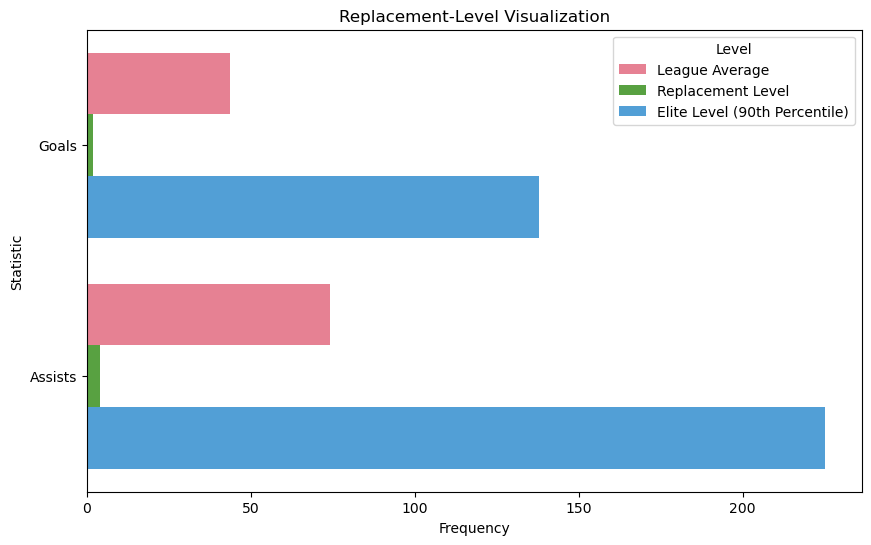

In [664]:

# Used ChatGPT to assist with creating this graph. I made a couple of changes to understand every aspect.
# The function "melt" is new to me but was very helpful for this graph!

# Define the statistics to visualize
stats = ['goals', 'assists']


valuesOfInterest = {
    'Statistic': [],
    'League Average': [],
    'Replacement Level': [],
    'Elite Level (90th Percentile)': []
}

for stat in stats:
    valuesOfInterest['Statistic'].append(stat.capitalize())
    valuesOfInterest['League Average'].append(player_stats[stat].mean())
    valuesOfInterest['Replacement Level'].append(np.percentile(player_stats[stat], 30))
    valuesOfInterest['Elite Level (90th Percentile)'].append(np.percentile(player_stats[stat], 90))

df = pd.DataFrame(valuesOfInterest)


levels = df.melt(
    id_vars='Statistic',
    var_name='Level',
    value_name='Value'
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=levels,
    x='Value',
    y='Statistic',
    hue='Level',
    palette='husl'
)
plt.title('Replacement-Level Visualization')
plt.xlabel('Frequency')
plt.ylabel('Statistic')
plt.show()




Calculating additional values needed for my Goals Above Replacement model. In order to take into account that some players
don't play the same amount it makes sense to standardize the statistics by calculating their averages per 82 games (1 season).

In [666]:

# Offense
player_stats['goals_per_game'] = player_stats['goals']/player_stats['games_played']
player_stats['assists_per_game'] = (player_stats['assists']/player_stats['games_played'])
player_stats['shots_per_game'] = (player_stats['shots']/player_stats['games_played'])
player_stats['giveaways_per_game'] = (player_stats['giveaways']/player_stats['games_played'])

# Defense
player_stats['hits_per_game'] = (player_stats['hits']/player_stats['games_played'])
player_stats['blocked_per_game'] = (player_stats['blocked']/player_stats['games_played'])
player_stats['takeaways_per_game'] = (player_stats['takeaways']/player_stats['games_played'])

# Power Play
player_stats['powerPlayGoals_per_game'] = (player_stats['powerPlayGoals']/player_stats['games_played'])
player_stats['powerPlayAssists_per_game'] = (player_stats['powerPlayAssists']/player_stats['games_played'])


# Penalty Kill
player_stats['shortHandedGoals_per_game'] = (player_stats['powerPlayGoals']/player_stats['games_played'])
player_stats['shortHandedAssist_per_game'] = (player_stats['powerPlayAssists']/player_stats['games_played'])
player_stats['penaltyMinutes_per_game'] = (player_stats['powerPlayGoals']/player_stats['games_played'])

#additional values
player_stats['faceoff_percent'] = player_stats['faceOffWins']/player_stats['faceOffTaken']

Assigning weights based on importance to the game

In [668]:
# Weights for 5 on 5 offensive stats
oWeights = {
    'goals': 1.0,
    'assists': 0.7,
    'shots': 0.2,
    'giveaways': -0.15,
    'faceoff_percent' : 0.05
}

# Weigth for 5 on 5 defensive stats
dWeights = {
    'hits': 0.1,    
    'blocked': 0.2,
    'takeaways': 0.15,
}

# Weights for 5 on 4 offense
powerPlayWeights = {
    'powerPlayGoals': 0.9,
    'powerPlayAssists': 0.7,
    
}

# Weights for 4 on 5 defense
penaltyKillWeights = {
    'shortHandedGoals': 1.0,
    'shortHandedAssists': 0.8,
    'penaltyMinutes': -0.5
}

Calculating Replacement Level for each varaiable

In [670]:
# Offense
replacement_level_goals = player_stats['goals_per_game'].quantile(0.3)
replacement_level_assists = player_stats['assists_per_game'].quantile(0.3)
replacement_level_shots = player_stats['shots_per_game'].quantile(0.3)
replacement_level_giveaways = player_stats['giveaways_per_game'].quantile(0.3)
replacement_level_faceoff = player_stats['faceoff_percent'].quantile(0.3)

In [672]:
# Defense
replacement_level_hits = player_stats['hits_per_game'].quantile(0.3)
replacement_level_blocked = player_stats['blocked_per_game'].quantile(0.3)
replacement_level_takeaways = player_stats['takeaways_per_game'].quantile(0.3)

In [674]:
# Power Play
replacement_level_powerPlayGoals = player_stats['powerPlayGoals_per_game'].quantile(0.3)
replacement_level_powerPlayAssists = player_stats['powerPlayAssists_per_game'].quantile(0.3)

In [676]:
# Pentaly Kill
replacement_level_shortHandedGoals = player_stats['powerPlayGoals_per_game'].quantile(0.3)
replacement_level_shortHandedAssists = player_stats['powerPlayAssists_per_game'].quantile(0.3)
replacement_level_penaltyMinutes = player_stats['powerPlayGoals_per_game'].quantile(0.3)

Calculating the individual contributions to GAR:
    

In [678]:
# Offense GAR

player_stats['offenseGAR'] = (
    oWeights['goals'] * (player_stats['goals_per_game'] - replacement_level_goals) +
    oWeights['assists'] * (player_stats['assists_per_game'] - replacement_level_assists) +
    oWeights['shots'] * (player_stats['shots_per_game'] - replacement_level_shots) +
    oWeights['giveaways'] * (player_stats['giveaways_per_game'] - replacement_level_giveaways) 
)



In [680]:
# Defense GAR

player_stats['defenseGAR'] = (
    dWeights['hits'] * (player_stats['hits_per_game'] - replacement_level_hits) +
    dWeights['blocked'] * (player_stats['blocked_per_game'] - replacement_level_blocked) +
    dWeights['takeaways'] * (player_stats['takeaways_per_game'] - replacement_level_takeaways)

)

In [571]:
# Power Play GAR

player_stats['ppGAR'] = (
    powerPlayWeights['powerPlayGoals'] * (player_stats['powerPlayGoals_per_game'] - replacement_level_powerPlayGoals) +
    powerPlayWeights['powerPlayAssists'] * (player_stats['powerPlayAssists_per_game'] - replacement_level_powerPlayAssists) 

)


In [682]:
# Penalty Kill GAR

player_stats['pkGAR'] = (
    penaltyKillWeights['shortHandedGoals'] * (player_stats['powerPlayGoals_per_game'] - replacement_level_shortHandedGoals) + 
    penaltyKillWeights['shortHandedAssists'] * (player_stats['powerPlayAssists_per_game'] - replacement_level_shortHandedAssists) +
    penaltyKillWeights['penaltyMinutes'] * (player_stats['powerPlayGoals_per_game'] - replacement_level_penaltyMinutes)
)


Calculating overall GAR:

In [684]:
player_stats['GAR'] = (
    .4*player_stats['offenseGAR'] +
    .3*player_stats['defenseGAR'] +
    .15*player_stats['ppGAR'] +
    .15*player_stats['pkGAR']
)

Summary of GAR

In [609]:
print(f"The GAR minimum is: {player_stats['GAR'].min()}")
print(f"The GAR first Quartile is: {player_stats['GAR'].quantile(.25)}")
print(f"The GAR mean is: {player_stats['GAR'].mean()}")
print(f"The GAR median is: {player_stats['GAR'].median()}")
print(f"The GAR third quartile is: {player_stats['GAR'].quantile(.75)}")
print(f"The GAR maximum is: {player_stats['GAR'].max()}")

The GAR minimum is: -0.1687431931746859
The GAR first Quartile is: 0.031224714399126708
The GAR mean is: 0.12757395749688175
The GAR median is: 0.10804252111102841
The GAR third quartile is: 0.19814205272695345
The GAR maximum is: 0.7940447281736288


In [688]:
print(f"player1 stats are : {player_stats.loc[player_stats['player_id'] == player1_id]}") 
print(f"player2 stats are :{player_stats.loc[player_stats['player_id'] == player2_id]}") 


player1 stats are :       player_id  games_played  timeOnIce  assists  goals  shots   hits  \
2605    8476460           710     855382      369    267   1585  537.0   

      powerPlayGoals  powerPlayAssists  penaltyMinutes  ...  \
2605              77                76             338  ...   

      powerPlayAssists_per_game  shortHandedGoals_per_game  \
2605                   0.107042                   0.108451   

      shortHandedAssist_per_game  penaltyMinutes_per_game  faceoff_percent  \
2605                    0.107042                 0.108451         0.456736   

      offenseGAR  defenseGAR     ppGAR     pkGAR       GAR  
2605    0.833565    0.312958  0.172535  0.139859  0.474172  

[1 rows x 39 columns]
player2 stats are :      player_id  games_played  timeOnIce  assists  goals  shots   hits  \
3122    8479318           459     528892      208    261   1717  238.0   

      powerPlayGoals  powerPlayAssists  penaltyMinutes  ...  \
3122              67                67        